# PROYECTO CLUSTERIZAION

### Contexto de data set y variables:

Siete tipos diferentes de frijoles secos se utilizaron en esta investigación, teniendo en cuenta características como la forma, el tipo y la estructura según la situación del mercado. Se desarrolló un sistema de visión por computadora para distinguir siete variedades diferentes de frijoles secos registrados con características similares con el fin de obtener una clasificación uniforme de las semillas.

* Area: Área del contorno del frijol, importante para diferenciar tamaños.
* Perimeter: Perímetro de la forma, ayuda a capturar la complejidad del contorno.
* MajorAxisLength y MinorAxisLength: Longitudes del eje mayor y menor, útiles para determinar la forma elíptica.
* AspectRatio: Relación entre el eje mayor y menor, describe qué tan alargada es la forma.
* Eccentricity: Grado de desviación de la forma respecto a un círculo perfecto, útil para evaluar la forma.
* ConvexArea: Área de la envolvente convexa, describe el área exterior de la forma.
* EquivDiameter: Diámetro equivalente, útil para comparar el tamaño en términos de un círculo.
* Solidity: Relación entre el área y el área convexa, útil para ver qué tan compacta es la forma.
* Roundness: Grado de redondez de la forma, relevante para comparar con otras formas circulares.
* Compactness: Grado de cómo la forma está distribuida dentro de su contorno.
* ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4: Factores que resumen características geométricas de la forma.


### Objetivo:

El objetivo es agrupar los frijoles en varios clusters según sus características físicas (como tamaño, peso, forma, entre otras), con el fin de identificar patrones o grupos dentro de los datos. Este proceso permite determinar si un frijol cumple con los estándares de calidad, facilitando la identificación de frijoles defectuosos o fuera de los parámetros esperados. Al analizar los siete tipos de frijoles presentes en el estudio, se pueden diferenciar y agrupar según sus características, permitiendo que el sistema detecte automáticamente posibles desviaciones o anomalías.

Esto lo realizaremos usando como primera instancia el procedimiento ETL para la Extraccion, Transformacion y Carga de los datos, realizandolo asi:

* Extracción: Obtener los datos de características del dataset "Dry Bean" 
    - Preparar una exploraciond detalada de los datos para su análisis y entendimiento.
* Transformación:
    - Manejo de datos faltantes.
    - Estandarización de las características.
    - Análisis exploratorio para entender la distribución y relaciones entre las variables.
* Carga:
    - Determinación del número óptimo de clusters.
    - Aplicación de K-means para agrupar los frijoles en clusters.
    - Visualización y análisis post-clustering.

## Exploracion

In [2]:
import pandas as pd

# Cargar dataset especificando el separador como punto y coma
dry_bean = pd.read_csv('Dry_Bean_Dataset.csv', sep=';')
# dry_bean = pd.read_csv('Dry_Bean_Dataset.csv', sep=';', usecols=['Eccentricity', 'AspectRation', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'])

# Mostrar las primeras filas del dataset para verificar la carga correcta
dry_bean.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,"610,291","208,1781167","173,888747","1,197191424","0,549812187",28715,"190,1410973","0,763922518","0,988855999","0,958027126","0,913357755","0,007331506","0,003147289","0,834222388","0,998723889",SEKER
1,28734,"638,018","200,5247957","182,7344194","1,097356461","0,411785251",29172,"191,2727505","0,783968133","0,984985603","0,887033637","0,953860842","0,006978659","0,003563624","0,909850506","0,998430331",SEKER
2,29380,"624,11","212,8261299","175,9311426","1,209712656","0,562727317",29690,"193,4109041","0,778113248","0,989558774","0,947849473","0,908774239","0,007243912","0,003047733","0,825870617","0,999066137",SEKER
3,30008,"645,884","210,557999","182,5165157","1,153638059","0,498615976",30724,"195,4670618","0,782681273","0,976695743","0,903936374","0,928328835","0,007016729","0,003214562","0,861794425","0,994198849",SEKER
4,30140,"620,134","201,8478822","190,2792788","1,06079802","0,333679658",30417,"195,896503","0,773098035","0,99089325","0,984877069","0,970515523","0,00669701","0,003664972","0,941900381","0,999166059",SEKER


In [3]:
# Tipos de datos de cada columna
print(dry_bean.dtypes)

Area                int64
Perimeter          object
MajorAxisLength    object
MinorAxisLength    object
AspectRation       object
Eccentricity       object
ConvexArea          int64
EquivDiameter      object
Extent             object
Solidity           object
roundness          object
Compactness        object
ShapeFactor1       object
ShapeFactor2       object
ShapeFactor3       object
ShapeFactor4       object
Class              object
dtype: object


Segun podemos observar, la variables no son del mismo tipo y esto podria generar problemas futuros, por lo cual, segun lo visto en los datos marcados por **head()**, pasaremos todas las variables a tipo **float** excepto la variable 'Class' que se necesita como un **string** ya que sirve como etiqueta y las variables que ya de por si son **integer**  como 'Area' y 'ConvexArea'.

In [4]:
# Columnas que deben ser convertidas a float
columns_to_convert = [
    'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
    'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness',
    'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'
]

# Reemplazar comas por puntos y convertir a float
for col in columns_to_convert:
    dry_bean[col] = dry_bean[col].str.replace(',', '.').astype(float)

# Verificar los tipos de datos después de la conversión
print(dry_bean.dtypes)

# Verificar los primeros valores para asegurarse de que la conversión fue exitosa
print(dry_bean.head())


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       2

In [5]:
# Dimensiones del dataset
print("Dimensiones del dataset:", dry_bean.shape)

# Descripción estadística básica
print(dry_bean.describe())

Dimensiones del dataset: (13611, 17)
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.

Con esto podemo evidenciar la varianza de la variable y tener en cuenta cuales pueden llegara a ser mas o mejnos convenientes para el deasrrollo de esta olucion, entendiendo en mejor medida el comportamineto de las variable, concluyendo que, variables como Solidity, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4 tienen una baja variabilidad por su cercania a la media, y variables como Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Roundness, Compactness tienden a tener mas variabilidad en us datos.

## Transformacion

In [6]:
# Comprobar si hay valores nulos
print(dry_bean.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


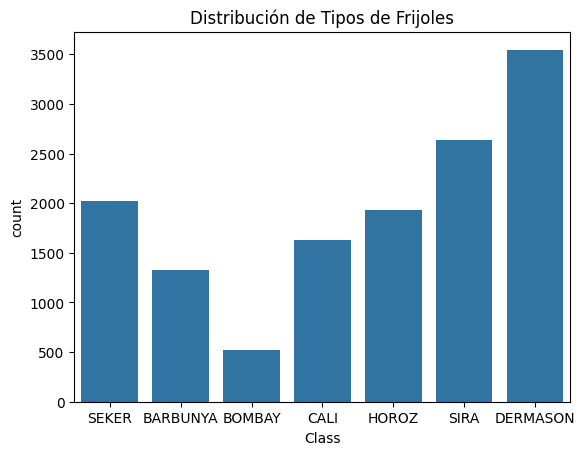

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de las diferentes clases de frijol
sns.countplot(x='Class', data=dry_bean)
plt.title('Distribución de Tipos de Frijoles')
plt.show()


Esto se realiza para determinar la cantidad de variables de frijol que existen, conocer su clasificacion y cuantas muestras tenemo de cada una a nuetra disposicion, concluyendo que tenemos 7 tipos diferentes de los cuales se puede evidenciar uina clara diferencia de datos entre las muestras.

Teniendo en cuenta esto podemos generar una columna o variable diferente para cada una de las clasificaciones para asi no generar inconvenientes futuras con nuna variable tipo String en la data.

In [8]:
# Crear variables dummy para cada tipo de frijol
df_dummies = pd.get_dummies(dry_bean, columns=['Class'], prefix='', prefix_sep='')

# Mostrar el DataFrame con las nuevas columnas dummy
print(df_dummies.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  ...  \
0      0.549812       28715     190.141097  0.763923  0.988856  ...   
1      0.411785       29172     191.272751  0.783968  0.984986  ...   
2      0.562727       29690     193.410904  0.778113  0.989559  ...   
3      0.498616       30724     195.467062  0.782681  0.976696  ...   
4      0.333680       30417     195.896503  0.773098  0.990893  ...   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  BARBUNYA  BOMBAY   CALI  \
0      0.003147      0.834222      0.998724     False   False  False   
1 

Ya teniendo bien separados e identificados cada uno de nuestros datos, podremos generar un analisis mas detallado de las variables mas relevantes para un manejo mas significativo y detallado de lo datos para el modelo que realizaremo.

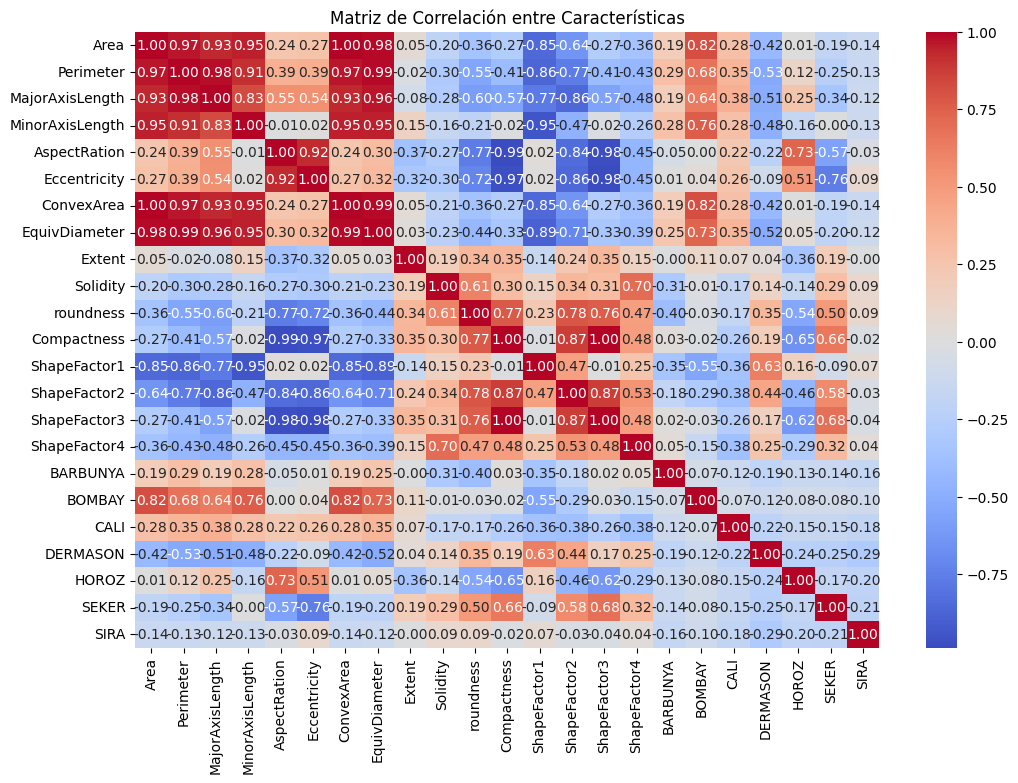

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Características')
plt.show()


Podemos evitenciar una fuerte relacion entre las variable Área (Area), Perímetro (Perimeter), Longitud del Eje Mayor (MajorAxisLength), Longitud del Eje Menor (MinorAxisLength), Diámetro Equivalente (EquivDiameter) y Área Convexa (ConvexArea). Esto sugiere que estas variables aumentan juntas, por lo cual usaremos estas variables para en el data set para entrenar el modelo.

Teniendo en cuenta esto usaremos solo estas variables ya que sugieren ser las mas sinificativas en el data set.

In [10]:
dry_bean = pd.read_csv('Dry_Bean_Dataset.csv', sep=';', usecols=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea'])

print(dry_bean.head())

    Area Perimeter MajorAxisLength MinorAxisLength  ConvexArea EquivDiameter
0  28395   610,291     208,1781167      173,888747       28715   190,1410973
1  28734   638,018     200,5247957     182,7344194       29172   191,2727505
2  29380    624,11     212,8261299     175,9311426       29690   193,4109041
3  30008   645,884      210,557999     182,5165157       30724   195,4670618
4  30140   620,134     201,8478822     190,2792788       30417    195,896503


### Estandarizamos y entrenamos la data para que no haya conflicto al momento de realizar el analisis

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reemplazar comas por puntos
dry_bean = dry_bean.replace(',', '.', regex=True).astype(float)

# Definir las variables independientes (X) y la variable dependiente (y)
X = dry_bean[['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea']]
y = dry_bean[['Area']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)


[[-0.21610567 -0.24731967 -0.03270894 -0.14156826 -0.20995841]
 [-0.48589207 -0.47907478 -0.32865142 -0.41155343 -0.41374569]
 [-0.23490991 -0.19980471 -0.18475439 -0.18678509 -0.24484447]
 ...
 [-0.06472026 -0.05082872  0.09117884  0.02554446 -0.07992553]
 [-1.04144228 -0.93497461 -1.18661633 -1.08305621 -0.85196076]
 [ 0.83246408  0.66847891  0.76518833  0.7585822   0.57392492]]
[[-0.67422867 -0.64266569 -0.50294221 -0.59400872 -0.53969755]
 [-1.00228937 -0.92972613 -1.06614609 -1.02422137 -0.81338862]
 [-0.62966569 -0.57752753 -0.48767167 -0.54515959 -0.50938617]
 ...
 [-0.76446237 -0.74841924 -0.67353448 -0.73249439 -0.63247474]
 [-0.09672103 -0.08097244  0.03053175 -0.01661471 -0.11441666]
 [ 2.99922203  2.48631582  3.86403756  3.2756704   3.52410131]]


Una vez estandarizado los datos de entrenamiento podemos proceder a generar el modelo de clusterización, comenzando con identificar la cantidad de clusteres optimos que necesitaremos para el modelo

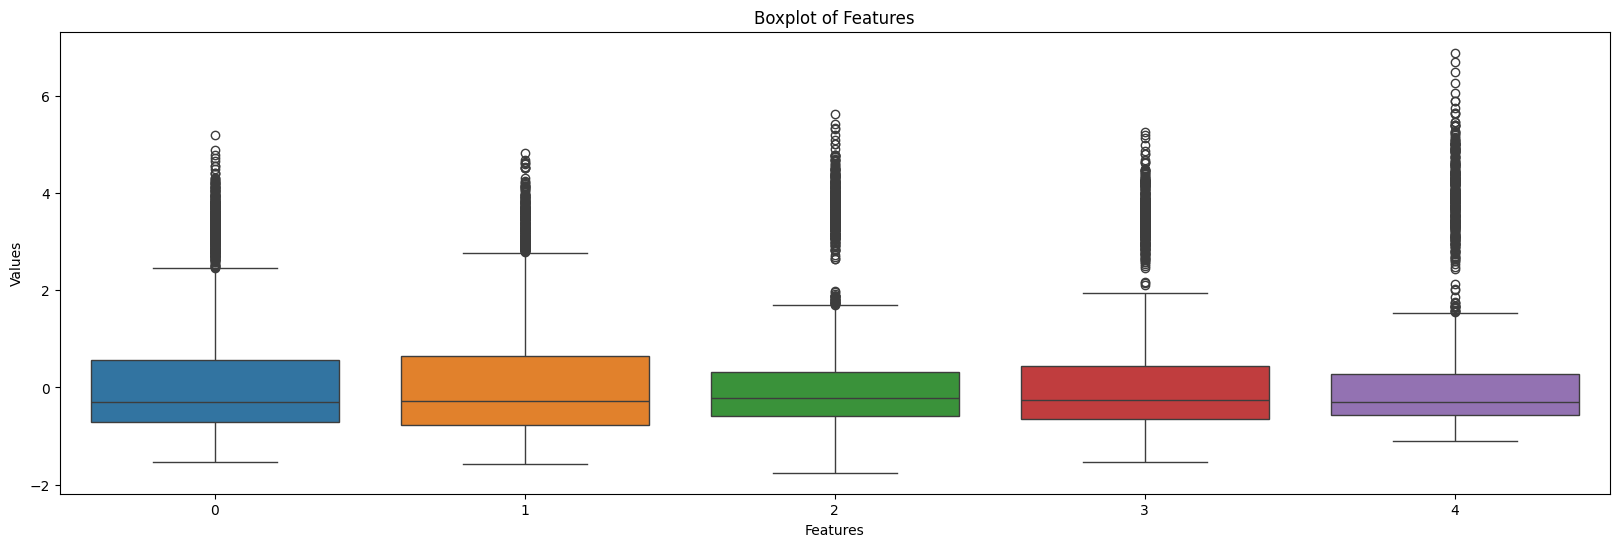

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(20, 6))  # Define el tamaño de la figura
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot of Features')  # Título del gráfico
plt.xlabel('Features')  # Etiqueta del eje X
plt.ylabel('Values')  # Etiqueta del eje Y
plt.show()  # Mostrar el gráfico

Teniendo en cuenta la cantidad de outliest en el data set se toma la desicion de continuar con el proceso ya que al er tantos datos uguiere que son relevantes y que al eliminar tantas muestras el data set se podria ver comprometido.

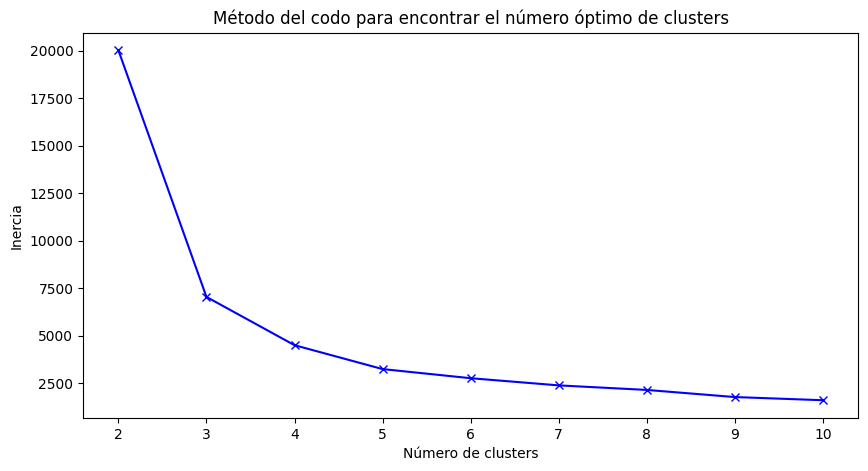

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Método del codo para encontrar el número óptimo de clusters
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()

De la grafica podemo identificar que la cantidad optima de de clusteres esta entre 4 y 5, en este caso usaremos 5 ya que aparentemente parece el punto clave en el cual los datos e empiezan a estabilizar

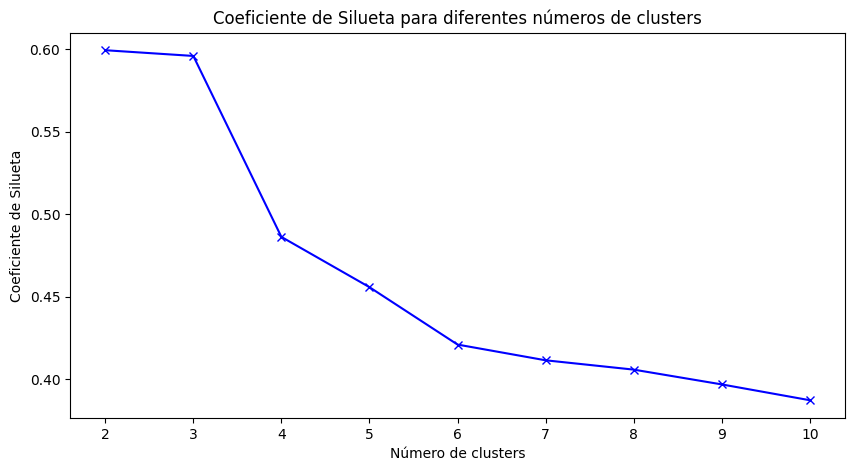

In [14]:
# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de clusters')
plt.show()


De la grafica de silueta podemo analizar que el numero optimo de cluteres que podemos llegara usar en el analiis es de 6 ya que es donde aparece el punto donde se estabiizan los datos

In [15]:
# Ajustar el modelo de K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=5, random_state=0)

In [16]:
# Predecir los clusters
clusters = kmeans.predict(X_train_scaled)

# Analizar los centroides de cada cluster
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:")
print(centroids)

Centroides de los clusters:
[[-0.93965492 -0.93691407 -0.81764039 -0.91742119 -0.74697302]
 [ 1.01612952  0.95516297  0.85516638  0.95323608  0.76732688]
 [ 3.33684951  3.12628953  3.7331003   3.56682919  3.98781199]
 [ 0.30730962  0.5008506  -0.1802495   0.18413101  0.06162151]
 [-0.43133971 -0.48184284 -0.21436766 -0.37419585 -0.38135094]]


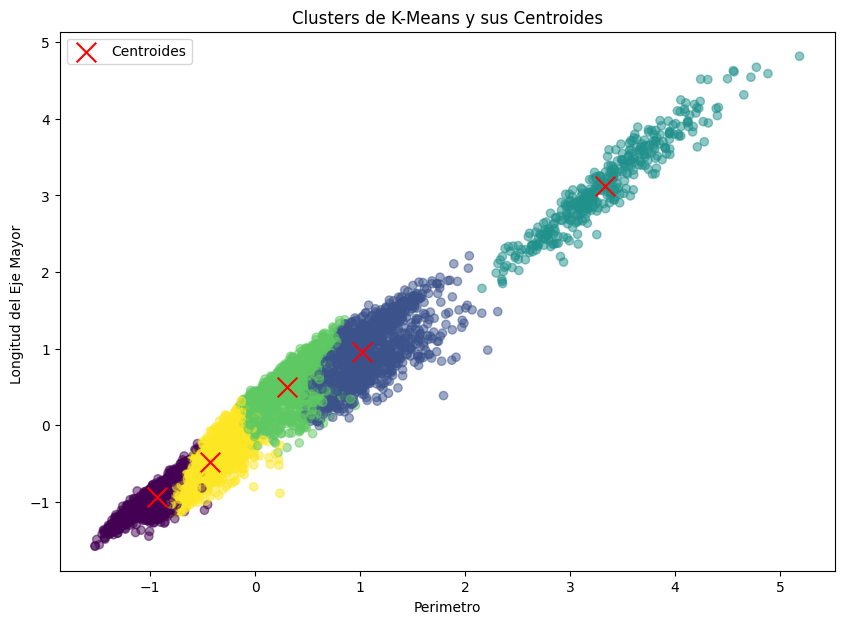

In [37]:
# Visualizar los clusters y los centroides
plt.figure(figsize=(10, 7))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.xlabel('Perimetro')
plt.ylabel('Longitud del Eje Mayor ')
plt.title('Clusters de K-Means y sus Centroides')
plt.legend()
plt.show()

La gráfica de los clusters y sus centroides proporciona una visualización clara de cómo se agrupan los frijoles según sus características físicas. Al analizar los centroides y la distribución de los clusters, se puede identificar patrones, determinar la calidad de los frijoles y detectar posibles anomalías, cumpliendo así con el objetivo de tu análisis de clusterización.

### Evaluar el modelo

Para fianalizar el analisis generaremos una pequewña prueba con el metodo de conglomerados para identificar si la cantiodad de clusteres que usamos era adecuada o no

Puntuación promedio de silueta: 0.5957283521793598


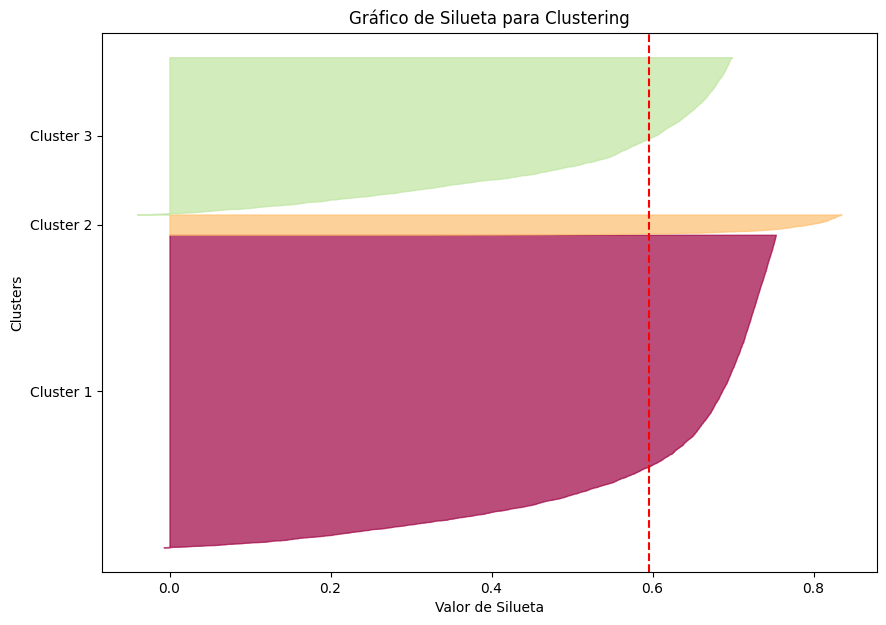

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Calcular la puntuación de la silueta para cada muestra
cluster_labels = kmeans.fit_predict(X_train_scaled)
silhouette_vals = silhouette_samples(X_train_scaled, cluster_labels)

# Calcular el puntaje promedio de silueta
silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
print(f"Puntuación promedio de silueta: {silhouette_avg}")

# Crear el gráfico de silueta
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(cluster_labels))
yticks = []

plt.figure(figsize=(10, 7))

for i in range(n_clusters):
    # Agregar las puntuaciones de silueta para cada cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.Spectral(float(i) / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

plt.axvline(silhouette_avg, color="red", linestyle="--")  # Línea indicando el valor promedio de silueta
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Valor de Silueta')
plt.ylabel('Clusters')
plt.title('Gráfico de Silueta para Clustering')
plt.show()
